<a href="https://colab.research.google.com/github/princeKike27/KMeans-Masculinity/blob/main/KMeans_Masculinity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans - Masculinity

For this project I analyzed from *FiveThirtyEight* about the way people think about masculinity. It was based on a survey ....

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df_survey = pd.read_csv('https://raw.githubusercontent.com/princeKike27/KMeans-Masculinity/main/masculinity.csv')

df_survey.head(3)

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,...,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,...,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Your physical health,Not selected,Not selected,Not selected,Not employed-retired,NaN,NaN,NaN,NaN,...,NaN,No,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,Not selected,Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,...,No,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Every situation is different,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,No,Married,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,College graduate,Michigan,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Survey DataFrame

In [3]:
# check shape of df
df_survey.shape

(1189, 98)

In [4]:
# check column names
df_survey.columns

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

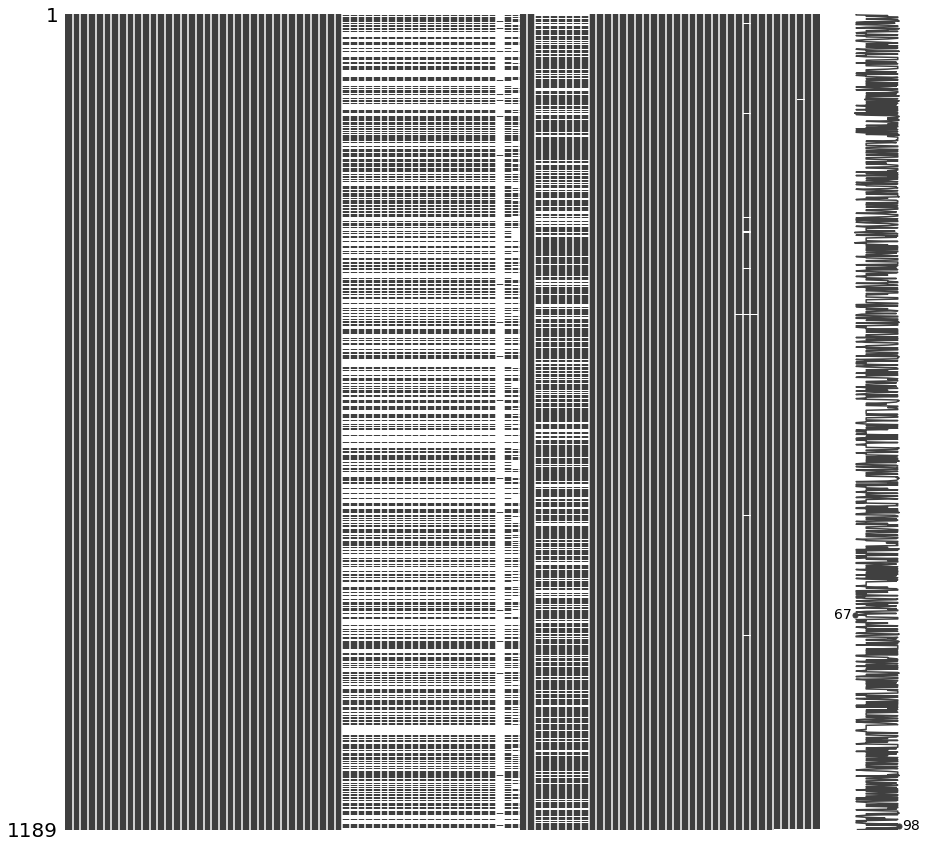

In [5]:
# check for missing values
import missingno as msg

msg.matrix(df_survey, figsize=(15,15))

In [6]:
# identify columns with the highest null values

for col in df_survey.columns: 
  print(f'{col}: {df_survey[col].isna().sum()}')

Unnamed: 0: 0
StartDate: 0
EndDate: 0
q0001: 0
q0002: 0
q0004_0001: 0
q0004_0002: 0
q0004_0003: 0
q0004_0004: 0
q0004_0005: 0
q0004_0006: 0
q0005: 0
q0007_0001: 0
q0007_0002: 0
q0007_0003: 0
q0007_0004: 0
q0007_0005: 0
q0007_0006: 0
q0007_0007: 0
q0007_0008: 0
q0007_0009: 0
q0007_0010: 0
q0007_0011: 0
q0008_0001: 0
q0008_0002: 0
q0008_0003: 0
q0008_0004: 0
q0008_0005: 0
q0008_0006: 0
q0008_0007: 0
q0008_0008: 0
q0008_0009: 0
q0008_0010: 0
q0008_0011: 0
q0008_0012: 0
q0009: 0
q0010_0001: 613
q0010_0002: 613
q0010_0003: 613
q0010_0004: 613
q0010_0005: 613
q0010_0006: 613
q0010_0007: 613
q0010_0008: 613
q0011_0001: 613
q0011_0002: 613
q0011_0003: 613
q0011_0004: 613
q0011_0005: 613
q0012_0001: 613
q0012_0002: 613
q0012_0003: 613
q0012_0004: 613
q0012_0005: 613
q0012_0006: 613
q0012_0007: 613
q0013: 1160
q0014: 613
q0015: 704
q0017: 0
q0018: 0
q0019_0001: 264
q0019_0002: 264
q0019_0003: 264
q0019_0004: 264
q0019_0005: 264
q0019_0006: 264
q0019_0007: 264
q0020_0001: 0
q0020_0002: 0
q0020_00

The questions that have the highest number of Null values are the ones that have the option to select all options that apply. For example question 10:    
- In which of the following ways would you say it's an advantage to be a man at yur work right now?
  - Men make more money
  - Men are taken more seriously
  - Men have more choice
  - Men have more promotion/professional development opportunities
  - Men are explicitly praised more often 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Question 7 Analysis
- How often would you say you do each of the following (Often, Sometimes rarely, Never, and not open to it)?
    - ask a friend for professional advice
    - ask a friend for presonal advice
    - express physical affection to male friends, like hugging
    - cry
    - get in a physical fight with another person
    - have sexual relations with women, including anything from kissing to sex
    - have sexual relations with men, including anything from kissing to sex


In [11]:
# check different answers for each subquestion in question 7
sub_q = 'q0007_000'

for i in range(1,8):
  # get subquestion
  q = sub_q + str(i)

  print(q)
  print(df_survey[q].value_counts())
  print('\n')
  


q0007_0001
Sometimes                    537
Rarely                       324
Often                        142
Never, but open to it        123
Never, and not open to it     53
No answer                     10
Name: q0007_0001, dtype: int64


q0007_0002
Sometimes                    514
Rarely                       387
Often                        123
Never, but open to it        101
Never, and not open to it     50
No answer                     14
Name: q0007_0002, dtype: int64


q0007_0003
Sometimes                    364
Rarely                       339
Never, and not open to it    224
Often                        166
Never, but open to it         85
No answer                     11
Name: q0007_0003, dtype: int64


q0007_0004
Rarely                       505
Sometimes                    371
Never, but open to it        121
Never, and not open to it     78
No answer                     71
Often                         43
Name: q0007_0004, dtype: int64


q0007_0005
Never, and not open t

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Mapping Answers of Question 7

- The answers of the different subquestions will be mapped to numbers so they can be used in the *KMeans* model. They are ordinal categorical variables so their number counterparts will resemble this organization

  - Often >> 4
  - Sometimes >> 3
  - Rarely >> 2
  - Never, but open to it >> 1
  - Never, and not open to it >> 0

In [12]:
# create question variable
question = 'q0007_000'

# loop through each subquestion 
for i in range(1, 8):
  q = question + str(i)
  df_survey[q] = df_survey[q].map({'Never, and not open to it': 0,
                                   'Never, but open to it': 1,
                                   'Rarely': 2,
                                   'Sometimes': 3,
                                   'Often': 4})
  print(q)
  print(df_survey[q].value_counts())
  print('\n')

q0007_0001
3.0    537
2.0    324
4.0    142
1.0    123
0.0     53
Name: q0007_0001, dtype: int64


q0007_0002
3.0    514
2.0    387
4.0    123
1.0    101
0.0     50
Name: q0007_0002, dtype: int64


q0007_0003
3.0    364
2.0    339
0.0    224
4.0    166
1.0     85
Name: q0007_0003, dtype: int64


q0007_0004
2.0    505
3.0    371
1.0    121
0.0     78
4.0     43
Name: q0007_0004, dtype: int64


q0007_0005
0.0    710
1.0    228
2.0    217
3.0     22
4.0      7
Name: q0007_0005, dtype: int64


q0007_0006
4.0    427
3.0    384
2.0    155
0.0    102
1.0     91
Name: q0007_0006, dtype: int64


q0007_0007
0.0    1001
1.0      60
3.0      41
4.0      39
2.0      31
Name: q0007_0007, dtype: int64




In [24]:
# check data mapped
df_survey[['q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 'q0007_0005', 'q0007_0006', 'q0007_0007']]

,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007
0,4.0,4.0,4.0,4.0,0.0,0.0,4.0
1,2.0,3.0,1.0,2.0,0.0,2.0,0.0
2,3.0,3.0,3.0,2.0,1.0,4.0,0.0
3,2.0,2.0,3.0,2.0,2.0,4.0,0.0
4,3.0,2.0,0.0,1.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...
1184,3.0,3.0,4.0,3.0,3.0,3.0,3.0
1185,3.0,3.0,2.0,2.0,1.0,4.0,0.0
1186,4.0,3.0,0.0,3.0,2.0,4.0,0.0
1187,1.0,1.0,0.0,0.0,3.0,3.0,0.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Plotting the Data

##### Cry Vs Getting in a Physical fight

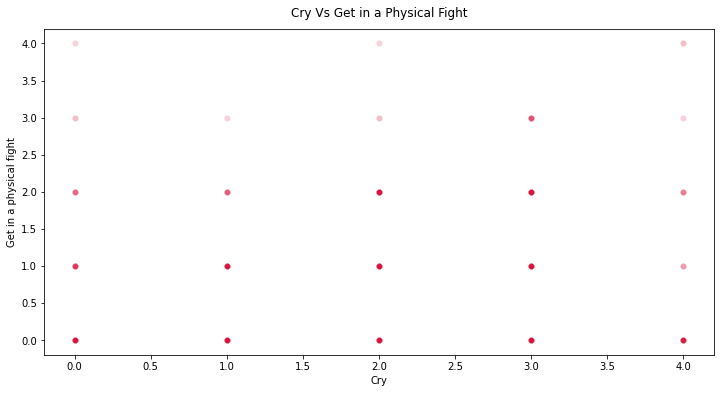

In [19]:
# list to store questions header for plot axis
questions_headers = ['Ask a friend for professional advice', 'Ask a friend for personal advice', \
                     'Express physical affection to male friends', 'Cry', 'Get in a physical fight', \
                     'Have sexual relations with women', 'Have sexual relations with men']

# scatterplot Cry Vs Get in a physical fight
f, ax = plt.subplots(figsize=(12,6))

sns.scatterplot(x=df_survey['q0007_0004'], y=df_survey['q0007_0005'], alpha=0.1, color='crimson')
plt.xlabel('Cry')
plt.ylabel('Get in a physical fight')

plt.title('Cry Vs Get in a Physical Fight', pad=12)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### Ask a Friend for Personal Advice Vs Have Sexual Relationships with Women

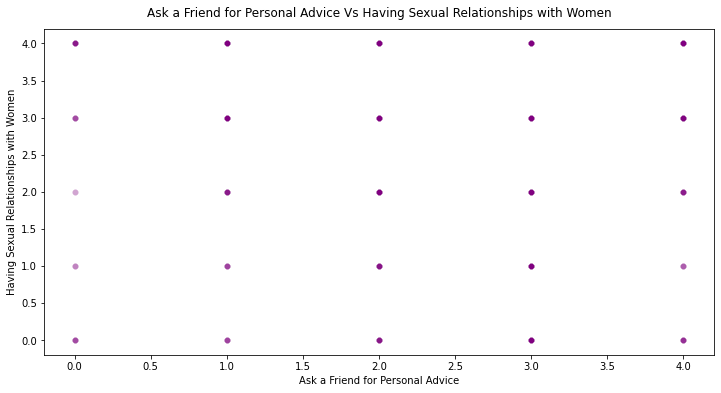

In [23]:
# ScatterPlot Ask a Friend for Personal Advice Vs Having Sexual Relationships with Women

f, ax = plt.subplots(figsize=(12,6))

sns.scatterplot(x=df_survey['q0007_0001'], y=df_survey['q0007_0006'], alpha=0.1, color='purple')
plt.xlabel('Ask a Friend for Personal Advice')
plt.ylabel('Having Sexual Relationships with Women')

plt.title('Ask a Friend for Personal Advice Vs Having Sexual Relationships with Women', pad=12)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### Multiple Scatter Plots

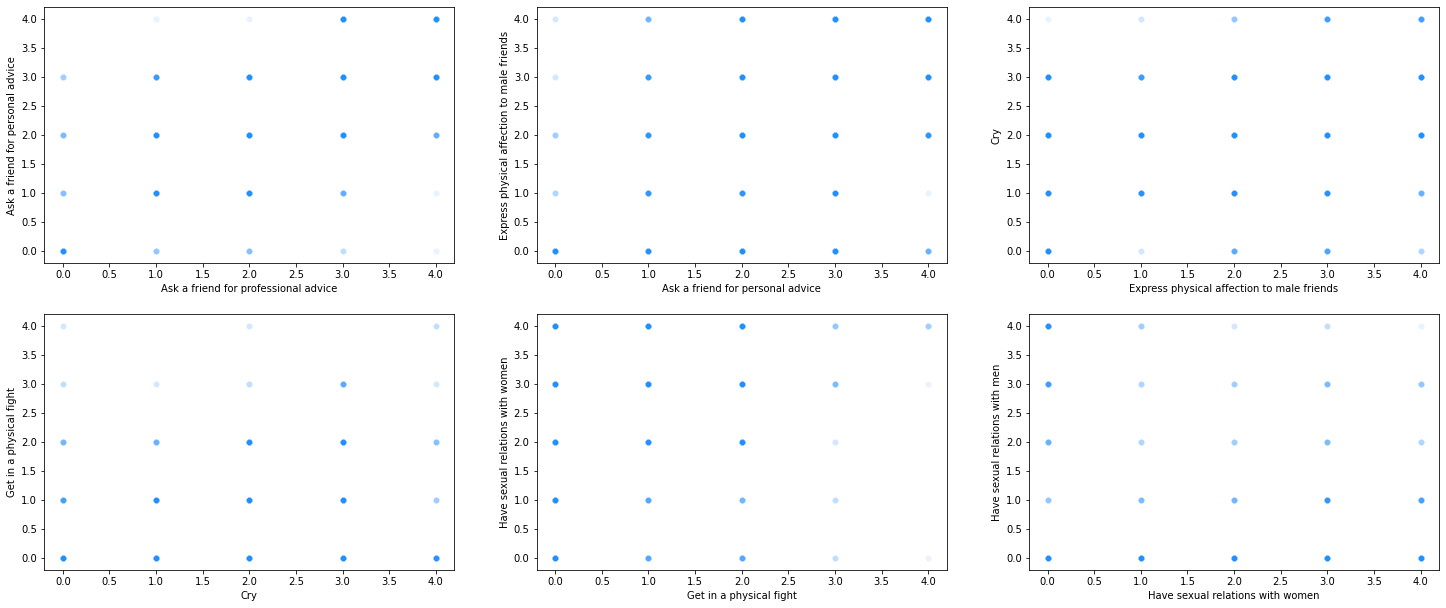

In [27]:
# variable to store question
question = 'q0007_000'

# create plot grid
fig = plt.figure(figsize=(25,16))

for i in range(1,8):
  if i != 7:
    q1 = question + str(i)
    q2 = question + str(i+1)

    # plot scatterplot in assigned position
    ax = plt.subplot(3,3,i)
    sns.scatterplot(x=df_survey[q1], y=df_survey[q2], alpha=0.1, color='dodgerblue')
    plt.xlabel(questions_headers[i-1])
    plt.ylabel(questions_headers[i])



plt.show()

Above can be seen the scatterplots of the different features when compared against each other.  

- In scatterplot 1 we can see that men who often and sometimes ask a friend for professional advice will also often ask a friend for personal advice.

- In scatterplot 5 we can observe that men who often get in a physical fight are having less sexual relations with women. On the other hand, men who rarely or never but open to engage in a fight have more often sexual realtions with women.

- In scatterplot 6 we can conclude that men who often have sexual relationships with women would never (not open to) having sexual relationships with men. On the same track are men who often have sexual relationships with other men they, would never (not open to) having sexual relationships with women.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)